In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import ConcatDataset
from matplotlib import pyplot as plt
from torchvision import transforms
from torch.optim import SGD, Adam

In [ ]:
train = datasets.CIFAR10('root',
                         train=True,
                         transform=transforms.ToTensor(),
                         download = True,)
test = datasets.CIFAR10('root',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)


Extracting root/cifar-10-python.tar.gz to root
Files already downloaded and verified


In [ ]:
train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: root
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
transform = transforms.Compose([
                                transforms.Resize((32,32)),
                                transforms.ColorJitter(brightness=[0.2,0.5],saturation=0.5),
                                transforms.RandomHorizontalFlip(p=0.45),
                                transforms.RandomVerticalFlip(p=0.55),
                                transforms.RandomRotation(20),
                                transforms.ToTensor(),
])

In [ ]:
train_augmentation = datasets.CIFAR10('root',
                                      train=True,
                                      transform = transform,
                                      download = True)

Files already downloaded and verified


In [ ]:
x,_ = train[0]

In [ ]:
y,_ = train_augmentation[0]

In [ ]:
x.shape,y.shape

(torch.Size([3, 32, 32]), torch.Size([3, 32, 32]))

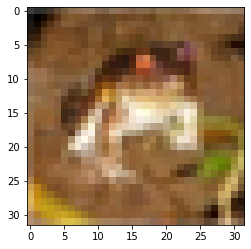

In [ ]:
plt.imshow(x.permute(1,2,0))

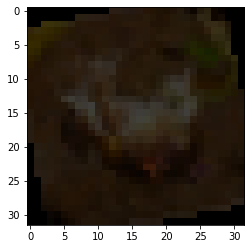

In [ ]:
plt.imshow(y.permute(1,2,0))

In [ ]:
incr_train = ConcatDataset([train,train_augmentation])

In [ ]:
train_loader = DataLoader(incr_train,
                          4,
                          True,
)

In [ ]:
val_loader = DataLoader(test,
                        4,
                        True
)

In [ ]:
model = nn.Sequential( 
nn.Conv2d(3,128,3,padding=1),
nn.BatchNorm2d(128),
nn.ReLU(),
nn.Conv2d(128,128,3,padding=1),
nn.BatchNorm2d(128),
nn.ReLU(),
nn.MaxPool2d(2,2),
##nn.Dropout(p=0.3),

nn.Conv2d(128,256,3,padding=1),
nn.BatchNorm2d(256),
nn.ReLU(),
nn.Conv2d(256,256,3,padding=1),
nn.BatchNorm2d(256),
nn.ReLU(),
nn.MaxPool2d(2,2),
#nn.Dropout(p=0.3),
 
 
nn.Conv2d(256,512,3,padding=1),
nn.BatchNorm2d(512),
nn.ReLU(),
nn.Conv2d(512,512,3,padding=1),
nn.BatchNorm2d(512),
nn.ReLU(),
nn.MaxPool2d(2,2),
#nn.Dropout(p=0.3),
 
nn.Flatten(),
nn.Linear(512*4*4,256),
nn.BatchNorm1d(256),
nn.ReLU(),
nn.Linear(256,128),
nn.BatchNorm1d(128),
nn.ReLU(),
nn.Linear(128,10)
).cuda()

In [ ]:
from torch.optim import Adam

In [ ]:
optimizer = Adam(model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
i = 0

In [ ]:
for epoch in range(0,50):
  running_loss = 0.0
  for x_train, y_train in train_loader:
    x_train = x_train.cuda()
    y_train = y_train.cuda()
    y_pred = model(x_train)
    loss = criterion(y_pred,y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    running_loss += loss.item()
    #print(loss.item())
    i = i+1
    if (i % 2000 == 1999):
      #print(running_loss)
      print('[%d, %5d] loss: %.3f' %
            (epoch+1,i+1,running_loss/2000))
      running_loss = 0.0

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1,  2000] loss: 2.270
[1,  4000] loss: 2.172
[1,  6000] loss: 2.063
[1,  8000] loss: 1.973
[1, 10000] loss: 1.935
[1, 12000] loss: 1.866
[1, 14000] loss: 1.784
[1, 16000] loss: 1.767
[1, 18000] loss: 1.727
[1, 20000] loss: 1.697
[1, 22000] loss: 1.641
[1, 24000] loss: 1.636
[2, 26000] loss: 0.792
[2, 28000] loss: 1.523
[2, 30000] loss: 1.515
[2, 32000] loss: 1.513
[2, 34000] loss: 1.473
[2, 36000] loss: 1.462
[2, 38000] loss: 1.456
[2, 40000] loss: 1.417
[2, 42000] loss: 1.403
[2, 44000] loss: 1.397
[2, 46000] loss: 1.387
[2, 48000] loss: 1.370
[2, 50000] loss: 1.342
[3, 52000] loss: 1.332
[3, 54000] loss: 1.298
[3, 56000] loss: 1.300
[3, 58000] loss: 1.261
[3, 60000] loss: 1.269
[3, 62000] loss: 1.242
[3, 64000] loss: 1.221
[3, 66000] loss: 1.235
[3, 68000] loss: 1.205
[3, 70000] loss: 1.215
[3, 72000] loss: 1.205
[3, 74000] loss: 1.213
[4, 76000] loss: 0.581
[4, 78000] loss: 1.154
[4, 80000] loss: 1.132
[4, 82000] loss: 1.128
[4, 84000] loss: 1.105
[4, 86000] loss: 1.119
[4, 88000] 

In [ ]:
total = 0
correct = 0

In [ ]:
with torch.no_grad():
  for x_val, y_val in val_loader:
    x_val = x_val.cuda()
    y_val = y_val.cuda()
    outputs = model(x_val)
    _,y_pred = torch.max(outputs,1)
    total += y_val.size(0)
    correct += (y_pred == y_val).sum().item()
print('Доля верных ответов на тестовых данных: %d %%' % (
    100 * correct / total))

Доля верных ответов на тестовых данных: 85 %
